
Summary Statistics:
       Rainfall (mm)  Elevation (m)  Slope (%)  Distance to River (m)  \
count      42.000000      42.000000  42.000000              42.000000   
mean      363.492381      66.785714  14.857143            3884.666667   
std       213.717040      40.307680   9.834165            2274.081264   
min       118.540000       6.000000   0.000000              48.000000   
25%       219.040000      31.000000   8.000000            1917.000000   
50%       249.540000      68.000000  14.000000            4132.000000   
75%       546.040000     102.000000  21.750000            5533.000000   
max       788.540000     140.000000  33.000000            7948.000000   

       Vulnerability Level  
count            42.000000  
mean              1.285714  
std               0.944450  
min               0.000000  
25%               1.000000  
50%               1.000000  
75%               2.000000  
max               3.000000  

Missing Values:
Location                     0
Rainfall (mm

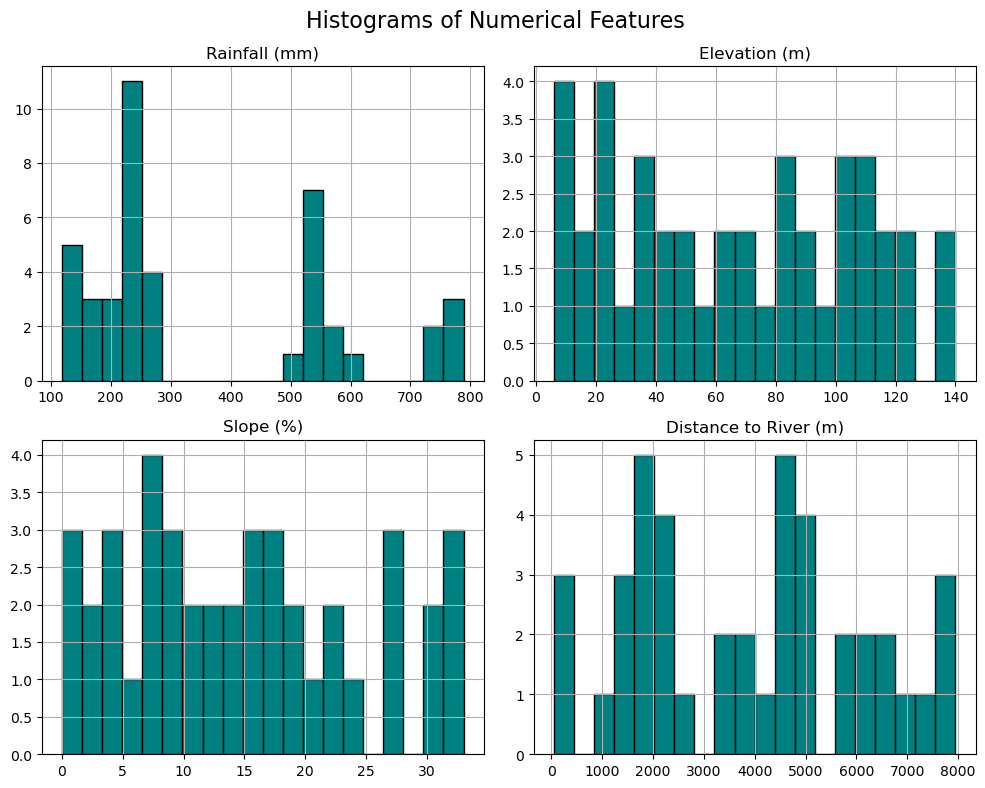

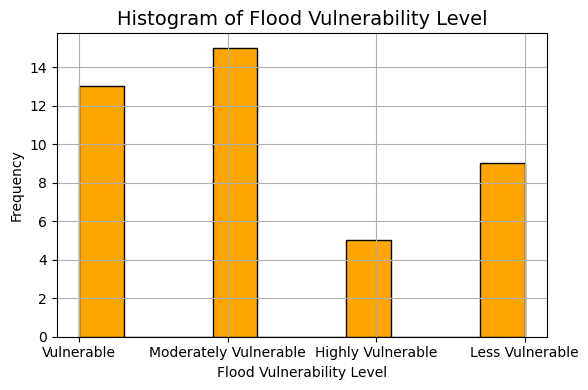

C:\Users\DELL\AppData\Local\Temp\ipykernel_11224\3282460401.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette="viridis", edgecolor="black")


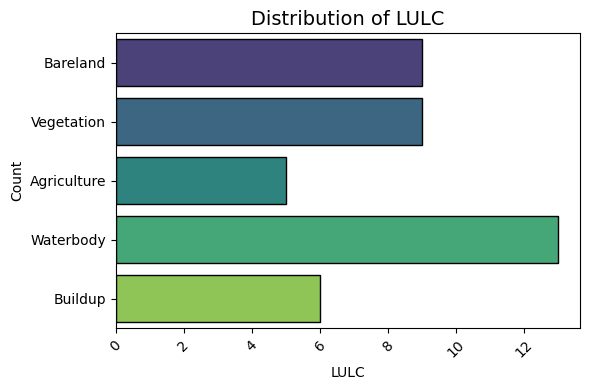

C:\Users\DELL\AppData\Local\Temp\ipykernel_11224\3282460401.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette="viridis", edgecolor="black")


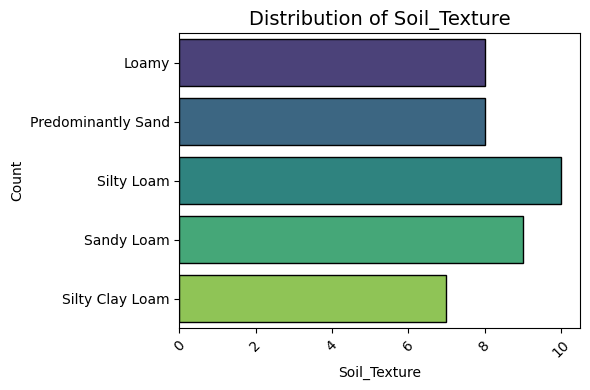


Training Logistic Regression...

Training Decision Tree...

Training Random Forest...

Model Performance Comparison:

Logistic Regression:
  Accuracy: 0.15
  Precision: 0.07
  Recall: 0.15
  F1 Score: 0.09

Decision Tree:
  Accuracy: 0.85
  Precision: 0.85
  Recall: 0.85
  F1 Score: 0.85

Random Forest:
  Accuracy: 0.77
  Precision: 0.80
  Recall: 0.77
  F1 Score: 0.77

Enter the following flood parameters:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('Chittagong_Flood_Vulnerability.csv')

# EDA: Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# EDA: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# EDA: Visualize numerical features
numerical_columns = ['Rainfall (mm)', 'Elevation (m)', 'Slope (%)', 'Distance to River (m)']
categorical_columns = ['LULC', 'Soil_Texture']

# Plot histograms for numerical columns
data[numerical_columns].hist(bins=20, figsize=(10, 8), color='teal', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 4))
data['Flood Vulnerability Level'].hist(bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Flood Vulnerability Level', fontsize=14)
plt.xlabel('Flood Vulnerability Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot distribution of categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data[col], palette="viridis", edgecolor="black")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Handle missing data
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Prepare the feature matrix (X) and target vector (y)
X = data[numerical_columns + categorical_columns]
y = data['Flood Vulnerability Level']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=1),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=1),
        "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=1)
    }

# Display model performance
print("\nModel Performance Comparison:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")

# Use the Random Forest model for predictions as it often performs well
final_model = models["Random Forest"]

# Prediction based on user input
def predict_flood_vulnerability():
    print("\nEnter the following flood parameters:")
    rainfall = float(input("Rainfall (mm): "))
    elevation = float(input("Elevation (m): "))
    slope = float(input("Slope (%): "))
    distance_to_river = float(input("Distance to River (m): "))
    lulc = input("LULC: ")
    soil_texture = input("Soil Texture: ")

    # Create the input DataFrame
    input_data = pd.DataFrame({
        'Rainfall (mm)': [rainfall],
        'Elevation (m)': [elevation],
        'Slope (%)': [slope],
        'Distance to River (m)': [distance_to_river],
        'LULC': [lulc],
        'Soil_Texture': [soil_texture]
    })

    # Encode categorical inputs
    try:
        input_data['LULC'] = label_encoders['LULC'].transform(input_data['LULC'])
        input_data['Soil_Texture'] = label_encoders['Soil_Texture'].transform(input_data['Soil_Texture'])
    except KeyError as e:
        print(f"Error: {e}. Ensure correct input for categorical variables.")
        return

    # Normalize numerical inputs
    input_data[numerical_columns] = scaler.transform(input_data[numerical_columns])

    # Predict flood vulnerability
    prediction = final_model.predict(input_data)[0]
    print(f"\nPredicted Flood Vulnerability Level: {prediction}")

# Call the prediction function
predict_flood_vulnerability()
